In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
## Data set laoding
california_df= pd.read_csv('california_housing_train.csv')

In [32]:
california_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [33]:
california_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [34]:
# Summerizing the stats of the data
california_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Exploratory Data Analysis

<AxesSubplot:>

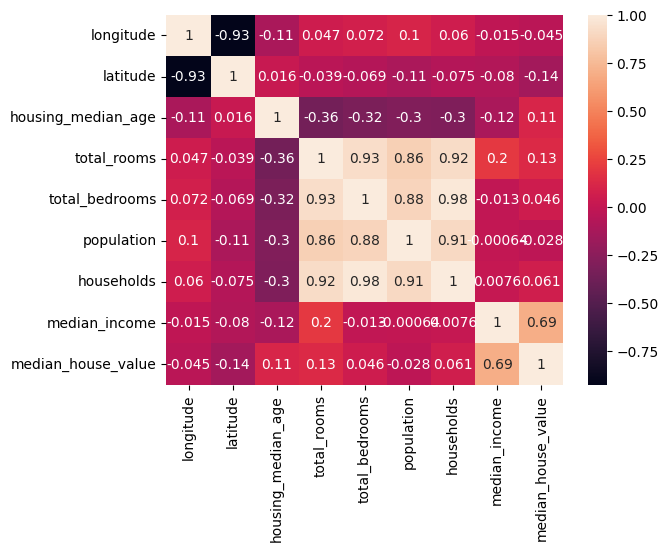

In [35]:
## Correlation
sns.heatmap(california_df.corr(), annot=True)

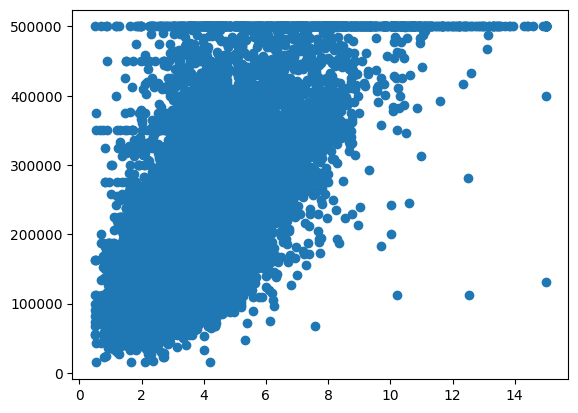

In [36]:
plt.scatter(california_df['median_income'], california_df['median_house_value'])

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

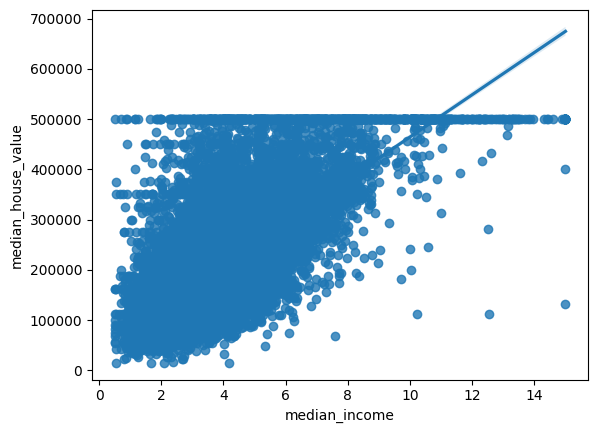

In [37]:
sns.regplot(x='median_income', y='median_house_value' , data=california_df)

In [38]:
X = california_df.drop('median_house_value', axis=1)
y = california_df['median_house_value']

In [39]:
y

0         66900.0
1         80100.0
2         85700.0
3         73400.0
4         65500.0
           ...   
16995    111400.0
16996     79000.0
16997    103600.0
16998     85800.0
16999     94600.0
Name: median_house_value, Length: 17000, dtype: float64

In [40]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [41]:
# Standardize the dataset
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
regression = LinearRegression()

In [44]:
regression.fit(X_train, y_train)

LinearRegression()

In [45]:
 ## print the coefficients and intercept
 print(regression.coef_)

[-88414.4020906  -93854.28748715  14157.32963219 -20697.05381005
  50358.64542352 -42013.18863426  16748.57366548  76543.04175675]


In [46]:
print(regression.intercept_)

206862.6012605043


In [47]:
## which parameters the model has been trained
regression.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [48]:
## Prediction with test data
reg_pred = regression.predict(X_test)

In [49]:
reg_pred

array([263813.14563079, 246833.89453683, 163844.52975526, ...,
       190046.25686933, 148940.36295669, 321345.1918468 ])

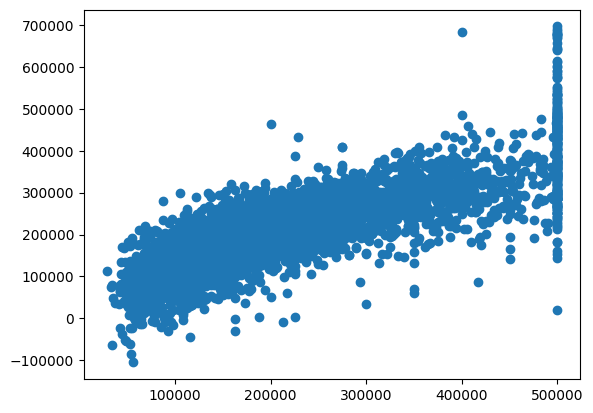

In [50]:
# scatter plot for the prediction
plt.scatter(y_test, reg_pred)

- The plot shows a linear prediction which means the prediction is good

In [51]:
# residuals
residuals  = y_test - reg_pred

In [52]:
residuals

5129     -23613.145631
15186     25566.105463
7422     -21644.529755
2531     -34776.746051
13286    126352.496362
             ...      
13302    -55203.081155
8103      18142.400654
2200     -57446.256869
9186     -73640.362957
15842    178655.808153
Name: median_house_value, Length: 5100, dtype: float64

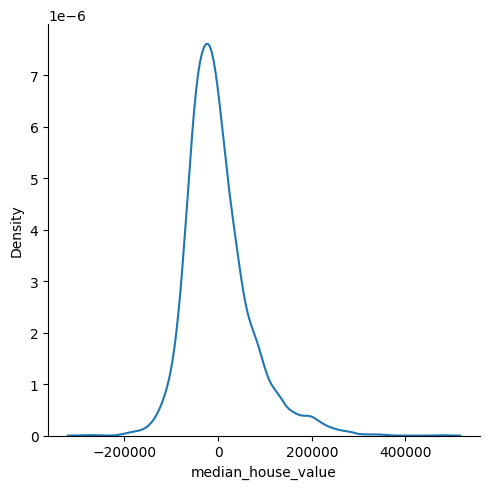

In [53]:
## plot the residuals
#sns.displot(residuals, bins=50)
# or
sns.displot(residuals , kind = "kde")


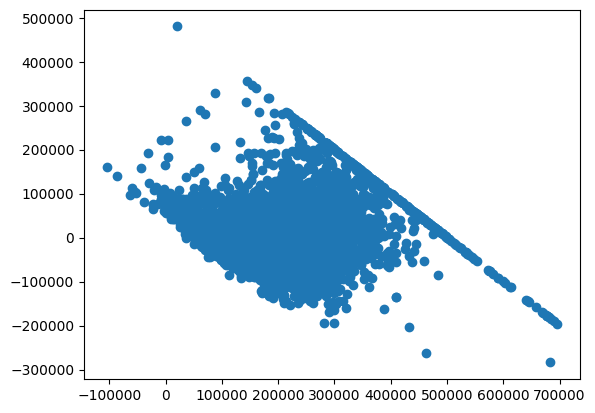

In [54]:
## Scatter plot with respect to the prediction and residuals
## Uniform distribution
plt.scatter(reg_pred, residuals)

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(y_test, reg_pred))
print(mean_squared_error(y_test, reg_pred))
print(np.sqrt(mean_squared_error(y_test, reg_pred)))

50544.77861334219
4691283870.375672
68492.94759590707


## R Square & Adjusted Square
- Formula
- R^2 = 1 - SSR/SST
- R^2 = Coefficient of determination SSR = sum of squares of residuals,
- Where SST = Total sum of squares


In [56]:
from sklearn.metrics import r2_score
score = r2_score(y_test, reg_pred)
print(score)

0.6533422981058383


Adjusted R2 = 1- [(1-R^2)(n-1)/(n-k-1)]
- Where:
- R^2 : The R^2 of the model
- n: the number of observations
- k : The number of the predictor variables

In [57]:
# display Adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6527975600160419

In [65]:
#regression.predict(scalar.transform())

# Pickling the model file to Deployment ---------------

In [66]:
import pickle

In [67]:
# Save the model to a file
filename = 'trained_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(regression, file)

In [68]:
pickled_model = pickle.load(open('trained_model.pkl', 'rb'))

In [69]:
## Prediction
pickled_model.predict(scalar.transform(california_df.drop('median_house_value', axis=1).iloc[0].values.reshape(1, -1)))

c:\Users\khair\OneDrive\Bureau\californiahouseprices\ML_California_house_prediction\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([1260.92750605])